In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
import pandas_datareader as pdr
import datetime

Scipy Maximum likelihood value of mu: 40.0006260625794
Scipy Maximum likelihood value for sigma: 9.997141900534873


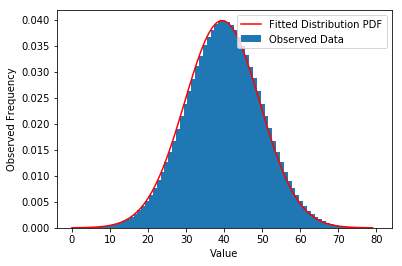

In [7]:
# Normal Distribution Sample Data
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 10000000)

# Fit the distribution using SciPy and compare those parameters with yours 
scipy_mu, scipy_std = stats.norm.fit(X)#______# Your code goes here
print ('Scipy Maximum likelihood value of mu:', scipy_mu)
print ('Scipy Maximum likelihood value for sigma:', scipy_std)

# Get the PDF, fill it with your calculated parameters, and plot it along x
x = np.linspace(0, 80, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(stats.norm.pdf(x, loc=np.mean(X), scale=np.std(X)), color='red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);



Scipy lambds estimate:  4.730873158356598


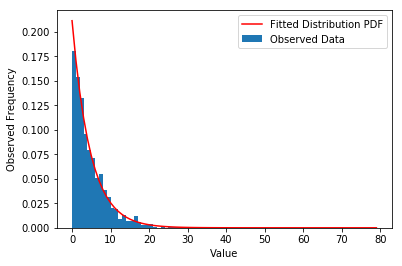

In [10]:
# Exponential distribution sample data
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

# Fit the distribution using SciPy and compare that parameter with yours 
_, l = stats.expon.fit(X) #______# Your code goes here
print ('Scipy lambds estimate: ', l)

# Get the PDF, fill it with your calculated parameter, and plot it along x
x = range(0, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(scipy.stats.expon.pdf(x, scale=l), color = 'red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);



(array([ 1.,  2.,  2.,  0.,  0.,  0.,  4.,  1.,  0.,  2.,  0.,  4.,  1.,
         3.,  3.,  4.,  9.,  7.,  7.,  5.,  6.,  8., 17., 23., 19., 21.,
        14., 11., 14., 15., 13.,  7.,  6.,  1.,  4.,  7.,  4.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.02250548, -0.02156079, -0.0206161 , -0.01967142, -0.01872673,
        -0.01778204, -0.01683735, -0.01589266, -0.01494798, -0.01400329,
        -0.0130586 , -0.01211391, -0.01116923, -0.01022454, -0.00927985,
        -0.00833516, -0.00739048, -0.00644579, -0.0055011 , -0.00455641,
        -0.00361173, -0.00266704, -0.00172235, -0.00077766,  0.00016702,
         0.00111171,  0.0020564 ,  0.00300109,  0.00394577,  0.00489046,
         0.00583515,  0.00677984,  0.00772452,  0.00866921,  0.0096139 ,
         0.01055859,  0.01150327,  0.01244796,  0.01339265,  0.01433734,
         0.01528202,  0.01622671,  0.0171714 ,  0.01811609,  0.01906077,
         0.02000546,  0.02095015,  0.02189484,  0.02283952,

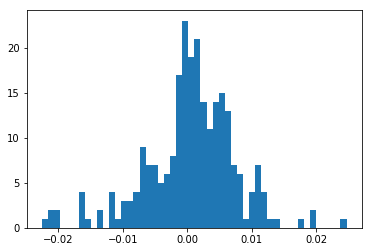

In [13]:
from datetime import datetime
pricing = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
returns = pricing.pct_change()[1:]

mu = np.mean(returns)
std = np.std(returns)

plt.hist(returns, bins=50)

In [17]:
from statsmodels.stats.stattools import jarque_bera
alpha = 0.05
stat, pval,_,_ = jarque_bera(returns)
print (pval)

if pval > alpha: 
    print ('Accept our null hypothesis')
if pval < alpha: 
    print ('Reject our null hypothesis')

3.8361548674400613e-07
Reject our null hypothesis


In [19]:
alpha = 0.05
stat, pval = scipy.stats.mstats.normaltest(returns)
print (pval)

if pval > alpha: 
    print ('Accept our null hypothesis')
if pval < alpha: 
    print ('Reject our null hypothesis')

0.0001245401472895408
Reject our null hypothesis
